In [2]:
%pip install umap-learn

Note: you may need to restart the kernel to use updated packages.Collecting umap-learn

   ---------------------------------------- 0/2 [pynndescent]
   ---------------------------------------- 0/2 [pynndescent]
   -------------------- ------------------- 1/2 [umap-learn]
   -------------------- ------------------- 1/2 [umap-learn]
   ---------------------------------------- 2/2 [umap-learn]




In [2]:
%pip install ipywidgets --upgrade

   ---------------------------------------- 0.0/914.9 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/914.9 kB ? eta -:--:--
   ---------------------- ----------------- 524.3/914.9 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 914.9/914.9 kB 1.7 MB/s  0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 1.2 MB/s eta 0:00:02
   -------------- ------------------------- 0.8/2.2 MB 1.5 MB/s eta 0:00:01
   ----------------------- ---------------- 1.3/2.2 MB 1.5 MB/s eta 0:00:01
   ---------------------------- ----------- 1.6/2.2 MB 1.5 MB/s eta 0:00:01
   --------------------------------- ------ 1.8/2.2 MB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 1.6 MB/s  0:00:01

   ------------- -------------------------- 1/3 [jupyterlab_widgets]
   -------------------------- --------

In [14]:
import pandas as pd

# Load log-normalized expression data
expr_log = pd.read_csv(
    "C:/Users/Aina Rif'ah/Downloads/INTERNSHIP/PROJECT 2/data/processed/GSE112509_log_normalized.csv",
    index_col=0
)

# Load metadata
meta = pd.read_csv(
    "C:/Users/Aina Rif'ah/Downloads/INTERNSHIP/PROJECT 2/data/processed/GSE112509_metadata.csv",
    index_col=0
)

expr_log.shape, meta.shape


((29830, 79), (79, 6))

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

sns.set(style="whitegrid")


GeneID,100287102,653635,102466751,107985730,645520,100996442,729737,102725121,102723897,102465909,...,4538,4564,4575,4568,4540,4541,4556,4519,4576,4571
GSM3071633,2.584963,10.273796,4.523562,2.0,1.0,5.832890,7.000000,1.584963,10.543032,4.247928,...,20.057860,9.957102,10.181152,10.014020,19.139252,18.548340,14.907031,19.465208,10.258566,14.647796
GSM3071634,2.807355,9.169925,2.584963,0.0,0.0,5.087463,6.554589,2.584963,9.390169,2.584963,...,18.842080,8.442943,8.968667,8.842350,18.424220,17.679391,14.237359,17.957714,10.142107,13.848427
GSM3071635,3.459432,10.633903,5.491853,1.0,1.0,6.599913,7.982994,3.321928,10.828136,4.700440,...,19.778201,8.643856,8.971544,8.787903,18.781930,18.218894,14.923420,19.044917,9.579316,13.481421
GSM3071636,4.087463,9.668885,4.247928,1.0,1.0,6.169925,6.066089,3.584963,9.805744,4.000000,...,18.656348,7.539159,7.971544,7.994353,17.533299,17.056437,13.478390,18.091136,9.992938,12.882643
GSM3071637,3.321928,9.900867,5.000000,1.0,1.0,6.820179,7.491853,3.169925,10.286558,4.321928,...,20.363874,9.997179,10.338736,10.194757,19.368937,18.854424,15.497977,19.495451,10.193525,14.411908


In [4]:
expr = pd.read_csv(
    r"C:\Users\Aina Rif'ah\Downloads\INTERNSHIP\PROJECT 2\data\processed\GSE112509_log_normalized.csv",
    index_col=0
)

expr.head()

,GSM3071633,GSM3071634,GSM3071635,GSM3071636,GSM3071637,GSM3071638,GSM3071639,GSM3071640,GSM3071641,GSM3071642,...,GSM3071703,GSM3071704,GSM3071705,GSM3071706,GSM3071707,GSM3071708,GSM3071709,GSM3071710,GSM3071711,GSM3071712
GeneID,,,,,,,,,,,,,,,,,,,,,
100287102,2.584963,2.807355,3.459432,4.087463,3.321928,1.584963,3.700440,3.169925,4.169925,3.807355,...,4.459432,3.906891,3.459432,3.700440,3.321928,3.584963,3.000000,4.321928,2.584963,3.584963
653635,10.273796,9.169925,10.633903,9.668885,9.900867,10.147205,10.728771,9.949827,10.948367,10.238405,...,10.629357,10.538189,9.714246,10.063395,9.955650,9.681238,9.612868,11.446049,9.247928,9.507795
102466751,4.523562,2.584963,5.491853,4.247928,5.000000,5.285402,5.930737,5.857981,6.523562,5.754888,...,5.584963,5.584963,5.000000,4.000000,5.554589,4.954196,4.807355,6.357552,3.906891,4.392317
107985730,2.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.584963,1.000000,1.584963,0.000000,...,1.000000,2.000000,1.584963,2.321928,2.000000,0.000000,2.000000,3.807355,2.000000,1.000000
645520,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.321928,1.000000,0.000000,0.000000,...,1.000000,1.584963,0.000000,2.321928,0.000000,0.000000,0.000000,0.000000,1.584963,0.000000


In [7]:
meta = pd.read_csv(
    r"C:\Users\Aina Rif'ah\Downloads\INTERNSHIP\PROJECT 2\data\processed\GSE112509_metadata.csv",
    index_col=0
)

meta.head()

,tissue,group,nevus type,braf mutation,nras mutation,condition
GSM3071633,benign melanocytic nevi,Naevi_1,dermal,mut,wt,Benign
GSM3071634,benign melanocytic nevi,Naevi_1,dermal,mut,mut,Benign
GSM3071635,benign melanocytic nevi,Naevi_1,compound,mut,wt,Benign
GSM3071636,benign melanocytic nevi,Naevi_1,dermal,wt,mut,Benign
GSM3071637,benign melanocytic nevi,Naevi_1,dermal,mut,wt,Benign


In [8]:
print("Expression shape:", expr.shape)
print("Metadata shape:", meta.shape)

Expression shape: (29830, 79)
Metadata shape: (79, 6)


In [9]:
# Ensure sample order matches
expr = expr[meta.index]

# Check for missing values
expr.isnull().sum().sum()


np.int64(0)

In [11]:
gene_variance = expr.var(axis=1)
gene_variance.describe()


count    29830.000000
mean         1.976997
std          1.892107
min          0.221618
25%          0.768215
50%          1.511024
75%          2.450261
max         37.343950
dtype: float64

In [12]:
top_genes = gene_variance.sort_values(ascending=False).head(1000).index
expr_var = expr.loc[top_genes]


In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

pca_df = pd.DataFrame(
    pca_result,
    columns=["PC1", "PC2"],
    index=X.index
)

pca_df["Condition"] = meta.loc[X.index, "condition"].values

pca_df.head()



,PC1,PC2,Condition
GSM3071633,-18.787524,-73.555035,Benign
GSM3071634,-148.785087,-154.860700,Benign
GSM3071635,-26.833356,-95.592799,Benign
GSM3071636,-144.715479,-111.653261,Benign
GSM3071637,-8.315532,-115.152875,Benign


In [17]:
variance_df = pd.DataFrame({
    "PC": ["PC1", "PC2"],
    "Variance Explained": pca.explained_variance_ratio_
})

variance_df



,PC,Variance Explained
0,PC1,0.182178
1,PC2,0.123938


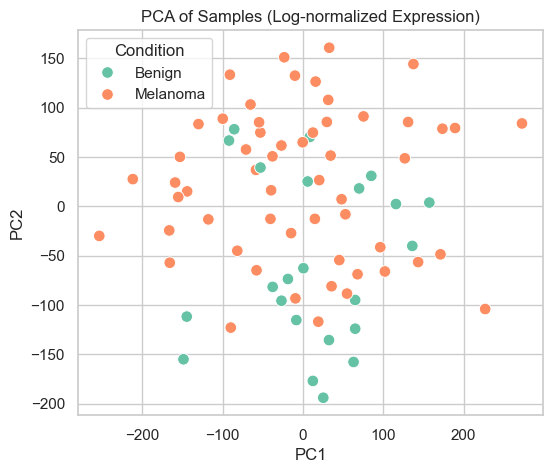

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="Condition",
    palette="Set2",
    s=70
)
plt.title("PCA of Samples (Log-normalized Expression)")
plt.show()


In [19]:
import numpy as np

distances = np.linalg.norm(
    pca_df[["PC1", "PC2"]] - pca_df[["PC1", "PC2"]].mean(),
    axis=1
)

threshold = distances.mean() + 2 * distances.std()
pca_df["Outlier"] = distances > threshold

pca_df[pca_df["Outlier"]]


,PC1,PC2,Condition,Outlier
GSM3071646,226.765333,-103.979593,Melanoma,True
GSM3071651,-253.637760,-29.925380,Melanoma,True
GSM3071710,272.593402,83.997692,Melanoma,True


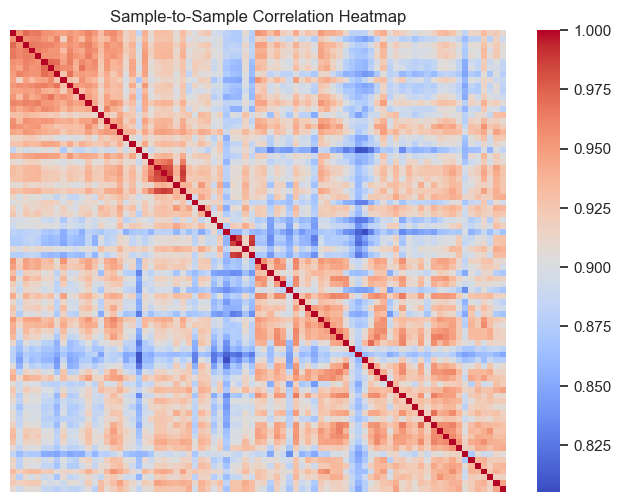

In [21]:
# Sample-to-sample correlation (correct & memory-safe)
sample_corr = X.T.corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    sample_corr,
    cmap="coolwarm",
    xticklabels=False,
    yticklabels=False
)
plt.title("Sample-to-Sample Correlation Heatmap")
plt.show()



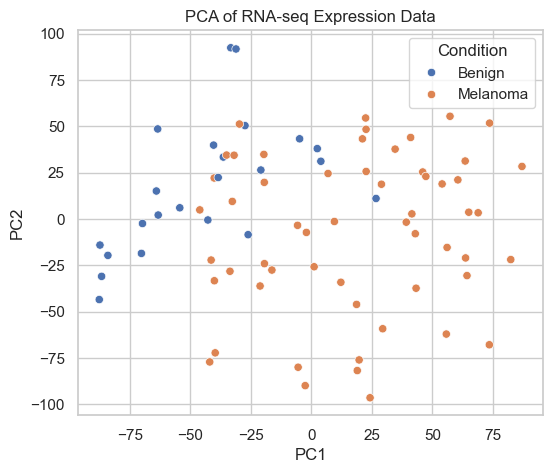

In [14]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Condition")
plt.title("PCA of RNA-seq Expression Data")
plt.show()


**PCA Interpretation:**  
Samples show clustering based on biological condition, indicating that major sources of variance are biologically meaningful. No extreme outliers were observed / Potential batch-driven separation was noted (edit based on results).


In [16]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [17]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(expr_var.T)

tsne_df = pd.DataFrame(tsne_result, columns=["Dim1", "Dim2"])
tsne_df["Condition"] = meta["condition"].values


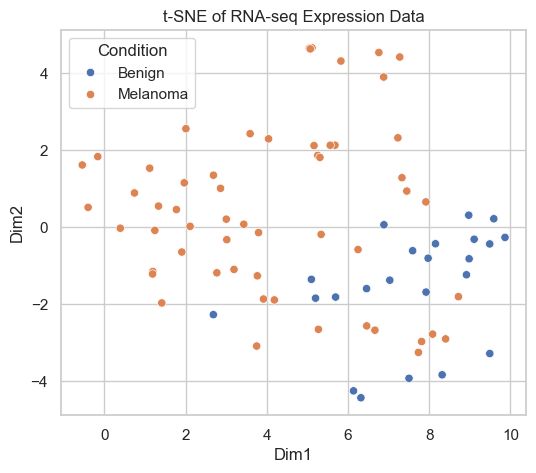

In [18]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=tsne_df, x="Dim1", y="Dim2", hue="Condition")
plt.title("t-SNE of RNA-seq Expression Data")
plt.show()


In [19]:
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
umap_result = umap_model.fit_transform(expr_var.T)

umap_df = pd.DataFrame(umap_result, columns=["UMAP1", "UMAP2"])
umap_df["Condition"] = meta["condition"].values


C:\BLAST\envs\varpred\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


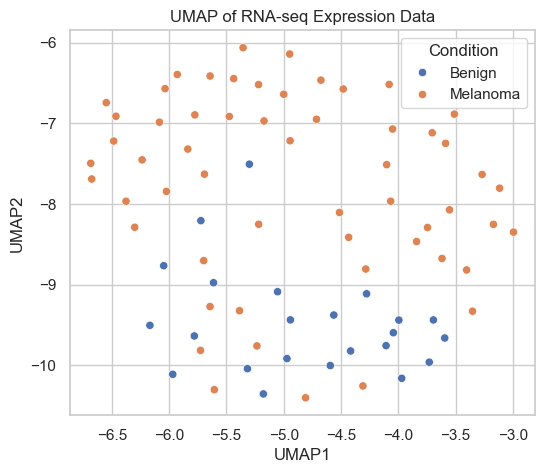

In [20]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=umap_df, x="UMAP1", y="UMAP2", hue="Condition")
plt.title("UMAP of RNA-seq Expression Data")
plt.show()


C:\BLAST\envs\varpred\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\BLAST\envs\varpred\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


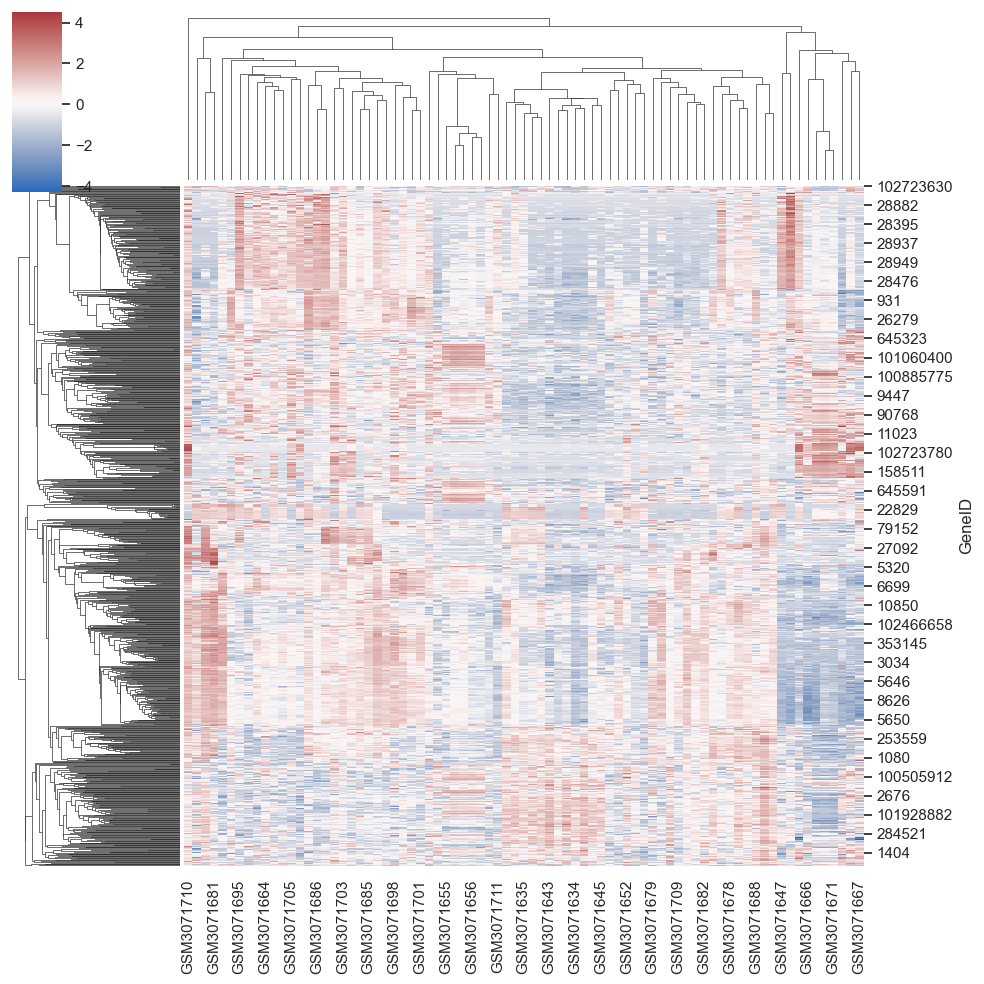

In [21]:
sns.clustermap(
    expr_var,
    z_score=0,
    cmap="vlag",
    figsize=(10,10),
    col_cluster=True,
    row_cluster=True
)
plt.show()


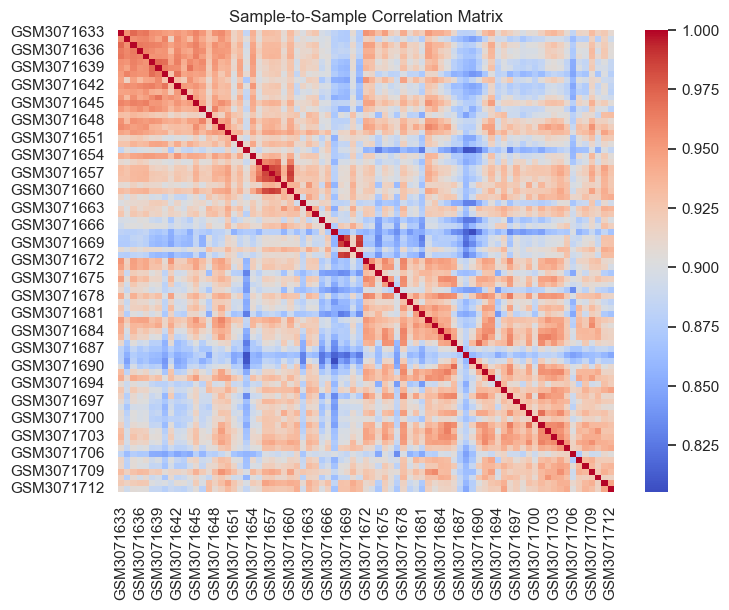

In [22]:
corr = expr.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap="coolwarm")
plt.title("Sample-to-Sample Correlation Matrix")
plt.show()


In [23]:
import os

FIG_DIR = r"C:\Users\Aina Rif'ah\Downloads\INTERNSHIP\PROJECT 2\results\week3_figures"
os.makedirs(FIG_DIR, exist_ok=True)

print("Figures will be saved to:", FIG_DIR)


Figures will be saved to: C:\Users\Aina Rif'ah\Downloads\INTERNSHIP\PROJECT 2\results\week3_figures


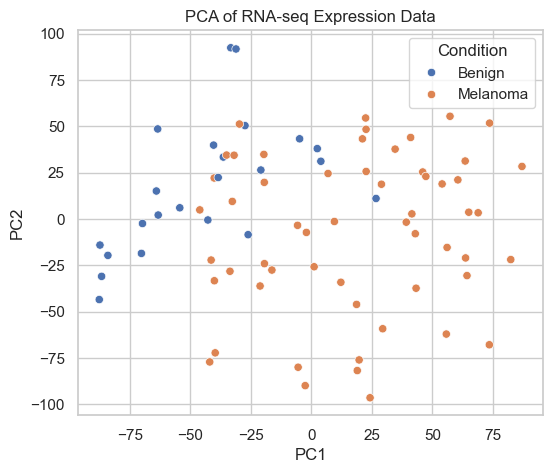

In [24]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Condition")
plt.title("PCA of RNA-seq Expression Data")

plt.savefig(os.path.join(FIG_DIR, "PCA_plot.png"), dpi=300, bbox_inches="tight")
plt.show()


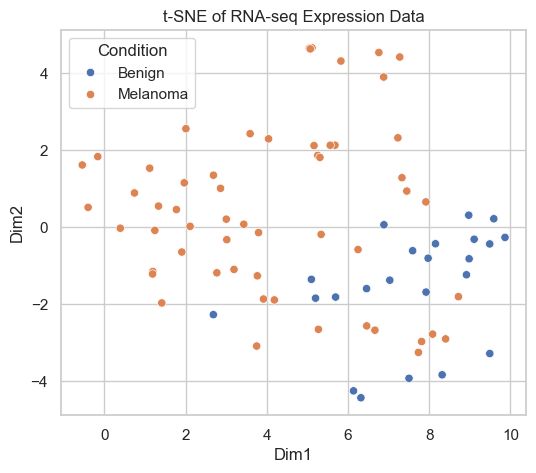

In [25]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=tsne_df, x="Dim1", y="Dim2", hue="Condition")
plt.title("t-SNE of RNA-seq Expression Data")

plt.savefig(os.path.join(FIG_DIR, "tSNE_plot.png"), dpi=300, bbox_inches="tight")
plt.show()


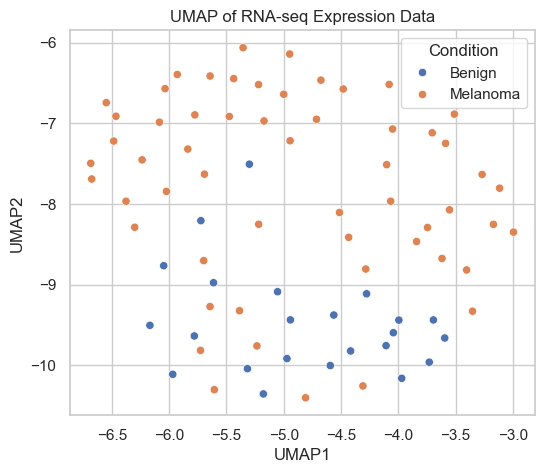

In [26]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=umap_df, x="UMAP1", y="UMAP2", hue="Condition")
plt.title("UMAP of RNA-seq Expression Data")

plt.savefig(os.path.join(FIG_DIR, "UMAP_plot.png"), dpi=300, bbox_inches="tight")
plt.show()


C:\BLAST\envs\varpred\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\BLAST\envs\varpred\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


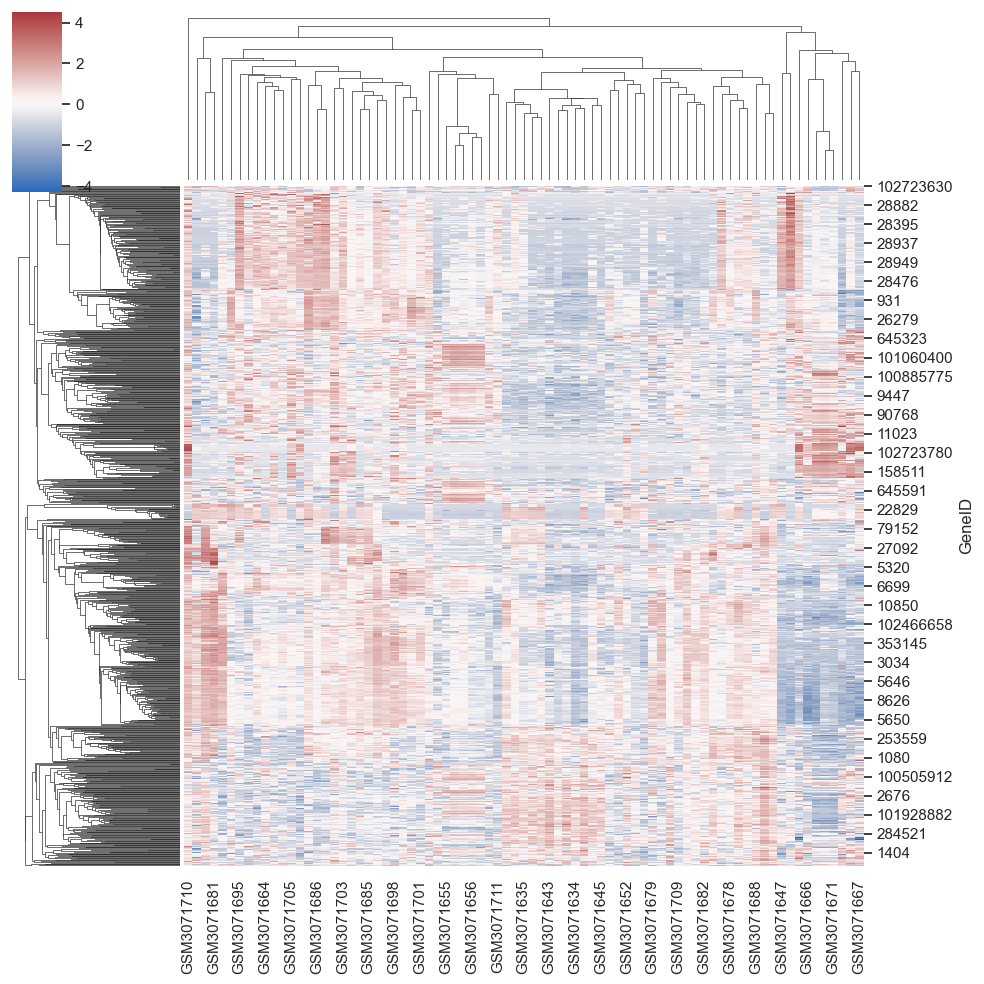

In [27]:
g = sns.clustermap(
    expr_var,
    z_score=0,
    cmap="vlag",
    figsize=(10,10),
    col_cluster=True,
    row_cluster=True
)

g.savefig(os.path.join(FIG_DIR, "Heatmap_top_variable_genes.png"), dpi=300)
plt.show()


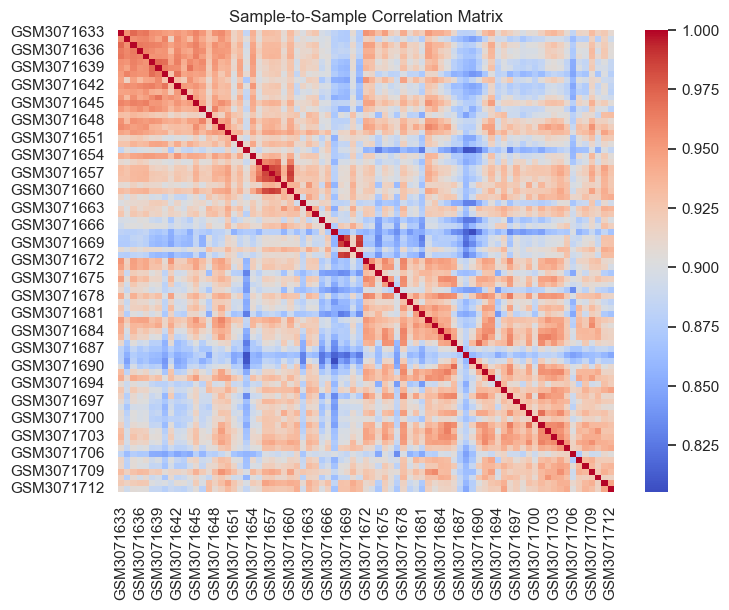

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap="coolwarm")
plt.title("Sample-to-Sample Correlation Matrix")

plt.savefig(os.path.join(FIG_DIR, "Sample_correlation_matrix.png"), dpi=300, bbox_inches="tight")
plt.show()
